## Discretisation

- Transforming continuous variables to discrete ones 

- Ouliers transform 

- Resolve skewness 

- Can be target guided

## Target independent methods 

- Equal width 
- Equal frequency 


#### Target guided methods 

- Trees


## Equal frequency discretisation

- Each bin has same number of observations 

## Equal frequency discretisation

- Each bin has same range  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cats = ['Age', 'Fare', 'Survived']

In [4]:
data = data[cats]
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [5]:
sns.set()
def distro(data, columns):
  import scipy.stats as stats
  for col in columns:
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    stats.probplot(data[col].dropna(), dist="norm", plot=ax[0])
    ax[0].set_title("QQPlot")
    sns.distplot(data[col], ax=ax[1])
    ax[1].set_title("Distribution")


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(data.mean()),
                                                    data['Survived'], test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [7]:
cols = cats[:-1]

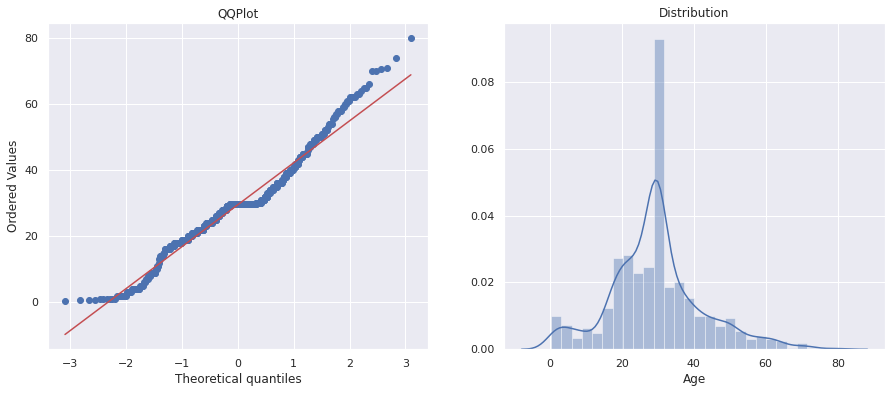

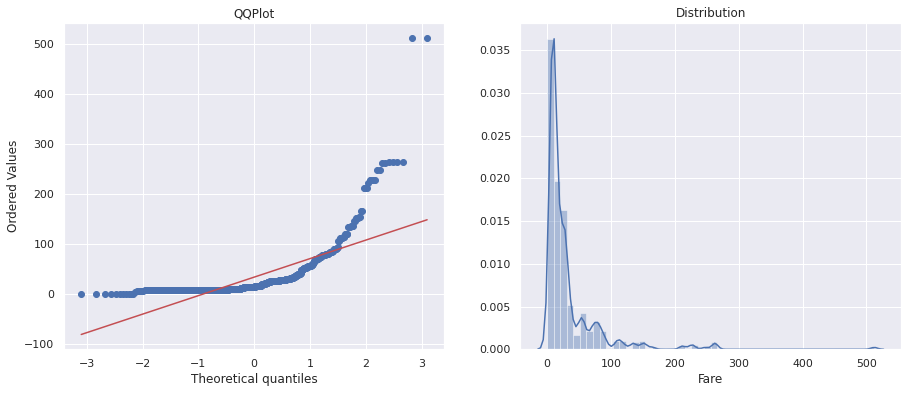

In [8]:
distro(X_train, cols)

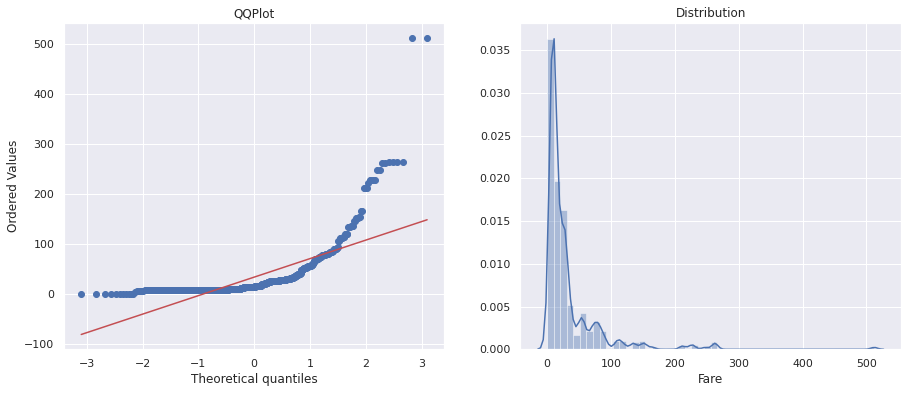

In [9]:
distro(X_train, ['Fare'])

In [10]:
X_train.head()

,Age,Fare
723,50.000000,13.0000
386,1.000000,46.9000
580,25.000000,30.0000
128,29.699118,22.3583
20,35.000000,26.0000


In [11]:
def dt_binning(X_train, X_test, y_train, cols):
  from sklearn.tree import DecisionTreeClassifier
  for col in cols:
    model = DecisionTreeClassifier(max_depth=2)
    model.fit(X_train[col].to_frame(), y_train)
    X_train[col] = model.predict_proba(X_train[col].to_frame())[:,1]
    X_test[col] = model.predict_proba(X_test[col].to_frame())[:,1]


In [12]:
dt_binning(X_train, X_test, y_train, ['Fare'])

In [13]:
i = 'Fare'
mapper = {k:i for i, k in enumerate(X_train[i].unique(), 0)} 
#mapper[np.nan] = np.nan
X_train.loc[:, i] = X_train.loc[:, i].map(mapper)
X_test.loc[:, i] = X_test.loc[:, i].map(mapper)


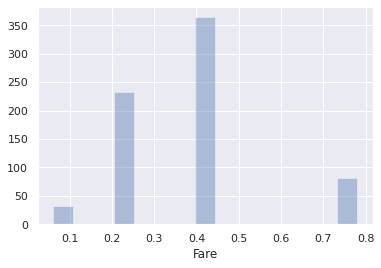

In [13]:
X_train.head()
sns.distplot(X_train['Fare'], kde=False)

In [14]:
# Explore Monotony
def monotony_plot(X_train,y_train, columns):
  for col in columns:
    fig = plt.figure()
    _temp = pd.concat([X_train, y_train], axis=1)
    fig = _temp.groupby([col])[y_train.name].mean().plot()
    fig.set_title('Processed')

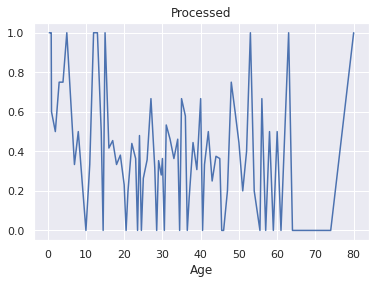

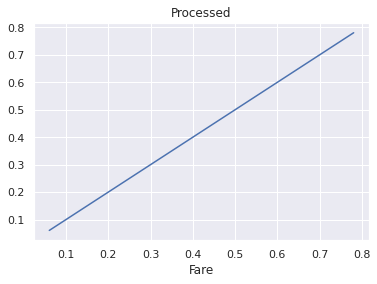

In [15]:
monotony_plot(X_train, y_train, cols)